In [141]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Analyzing the results of the experiments

In [144]:
df = pd.read_csv(".csv", sep=";")

In [145]:
df = df.sort_values("n")

In [146]:
index = df["n"].unique()
np.sort(index)

array([  100,   500,  1000,  5000, 20000, 60000], dtype=int64)

In [157]:
df = df[df["n"] != 100]

In [158]:
ratios = [0.15, 0.50, 1.] # Possible ratios

In [160]:
df_comp = df[df["type_exp"] == "complete"]
df_incomp = df[df["type_exp"] == "incomplete"]

In [161]:
df_ratios = [ df_incomp[df_incomp["B"]/df_incomp["n"] == ratio ]  for ratio in ratios ]

In [186]:
averaged_df_comp = df_comp.groupby("n").mean()

In [163]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22, 'font.serif' : ['Bookman']}) 

In [202]:
linewidth = 3
markersize = 15

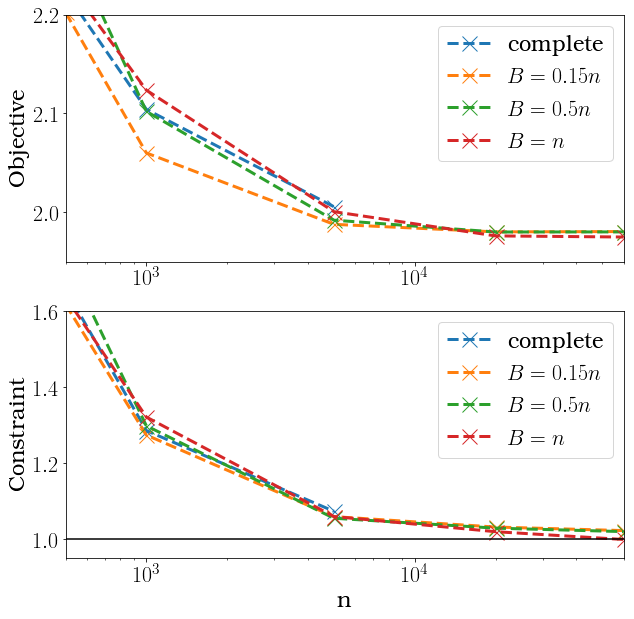

In [231]:
plt.figure(figsize=(10,10))

legend_labels = [r"$B = 0.15 n$", r"$B = 0.5 n$", r"$ B = n$"]

plt.subplot(2,1,1)
plt.ylim([1.95,2.2])
plt.plot(np.array(averaged_df_comp.index), np.array(averaged_df_comp["objective"]), linestyle="--", 
         linewidth=linewidth, marker="x", label="complete", ms = markersize)
for ratio, df_ratio, legend in zip(ratios, df_ratios, legend_labels):
    averaged_df_ratio = df_ratio.groupby("n").mean()
    plt.plot(np.array(averaged_df_ratio.index), np.array(averaged_df_ratio["objective"]), linestyle="--", 
             linewidth=linewidth, marker="x", label=legend, ms = markersize)
plt.legend()    
plt.ylabel("Objective")
plt.xlim([500,60000])
plt.xscale("log")

plt.subplot(2,1,2)
plt.ylim([0.95,1.6])
plt.plot(np.array(averaged_df_comp.index), np.array(averaged_df_comp["constraint"]), linestyle="--", 
         linewidth=linewidth, marker="x", label="complete", ms = markersize)

for ratio, df_ratio, legend in zip(ratios, df_ratios, legend_labels):
    averaged_df_ratio = df_ratio.groupby("n").mean()
    plt.plot(np.array(averaged_df_ratio.index), np.array(averaged_df_ratio["constraint"]), linestyle="--", 
             linewidth=linewidth, marker="x", label=legend, ms = markersize)
plt.plot([0,70000], [1,1], "black")

plt.xlim([500,60000])
plt.xscale("log")
plt.legend()    
plt.ylabel("Constraint")

plt.xlabel("n")
plu.save_graph_pdf("incomplete_U_statistics")
plt.show()